<a href="https://colab.research.google.com/github/kibrus/Emotion-detector/blob/main/CNN_Emotion_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup and load data

1.1 Install Dependencies and setups

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.7.0.32.46
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

Extracting the zip file

In [5]:
import zipfile
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the folder where your zip files are located in Google Drive
zip_folder_path = '/content/drive/MyDrive/Data/Imageclassification'

# Step 3: List of zip files to extract
zip_files = ['happy.zip', 'sad.zip']

# Step 4: Loop through each zip file and extract it to a corresponding folder
for zip_file in zip_files:
    # Full path to the zip file
    zip_path = os.path.join(zip_folder_path, zip_file)

    # Destination folder (based on the zip file name, e.g., 'happy' or 'sad')
    extract_to_path = os.path.join('/content/data', zip_file.split('.')[0])

    # Check if the file exists before extracting
    if os.path.exists(zip_path):
        # Create the destination folder if it doesn't exist
        if not os.path.exists(extract_to_path):
            os.makedirs(extract_to_path)

        # Extract the zip file into the corresponding folder
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)  # Extract into the specified folder
        print(f"Files from {zip_file} extracted successfully to {extract_to_path}")
    else:
        print(f"File not found: {zip_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files from happy.zip extracted successfully to /content/data/happy
Files from sad.zip extracted successfully to /content/data/sad


In [6]:
!ls /content/drive/MyDrive/Data/Imageclassification

happy.zip  sad.zip


1.2 Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data'

In [9]:
image_exts = ['jpeg', 'gif', 'bmp', 'png']

In [10]:
# Iterate through all files in the dataset and remove invalid images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Try to read the image using OpenCV
            img = cv2.imread(image_path)

            # Check if it's a valid image file using imghdr
            tip = imghdr.what(image_path)

            # If the image type is not in the allowed extensions, remove the file
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with Image {image_path}: {e}")

Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1110-ycv2h9n0pk9g5x7e.jpg
Image not in ext list data/sad/sad-man-260nw-82004164.jpg
Image not in ext list data/sad/sadness.jpg.webp
Image not in ext list data/sad/close-sad-pensive-millennial-woman-260nw-2458168367.jpg
Image not in ext list data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list data/sad/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list data/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in ext list data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list data/happy/businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data/happy/group-happy-smiling-people-chat-260nw-2299728955.jpg
Image not in ext list data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list data/happy/smiling-young-african-american-woman-2

1.3 Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#building data pipe line
data = tf.keras.utils.image_dataset_from_directory('data')

Found 381 files belonging to 2 classes.


Since the data file is not loaded into memory, we need to use the numpy_iterator to access the data.

In [13]:
#alowing as to loop through it
data_iterator = data.as_numpy_iterator()

In [14]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x792c3c10ee90>)

In [15]:
#grabing one batch back
batch = data_iterator.next()
batch

(array([[[[189.21875  , 189.21875  , 189.21875  ],
          [192.17969  , 192.17969  , 192.17969  ],
          [186.63281  , 186.63281  , 186.63281  ],
          ...,
          [  5.       ,   5.       ,   5.       ],
          [  5.       ,   5.       ,   5.       ],
          [  5.       ,   5.       ,   5.       ]],
 
         [[189.07188  , 189.07188  , 189.07188  ],
          [189.67038  , 189.67038  , 189.67038  ],
          [185.75581  , 185.75581  , 185.75581  ],
          ...,
          [  5.       ,   5.       ,   5.       ],
          [  5.       ,   5.       ,   5.       ],
          [  5.       ,   5.       ,   5.       ]],
 
         [[188.90782  , 188.90782  , 188.90782  ],
          [186.85976  , 186.85976  , 186.85976  ],
          [184.8554   , 184.8554   , 184.8554   ],
          ...,
          [  5.       ,   5.       ,   5.       ],
          [  5.       ,   5.       ,   5.       ],
          [  5.       ,   5.       ,   5.       ]],
 
         ...,
 
         [[1

In [16]:
#batch have 2 parts or length. The first part is images and labels
len(batch)

2

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
#lable
batch[1]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

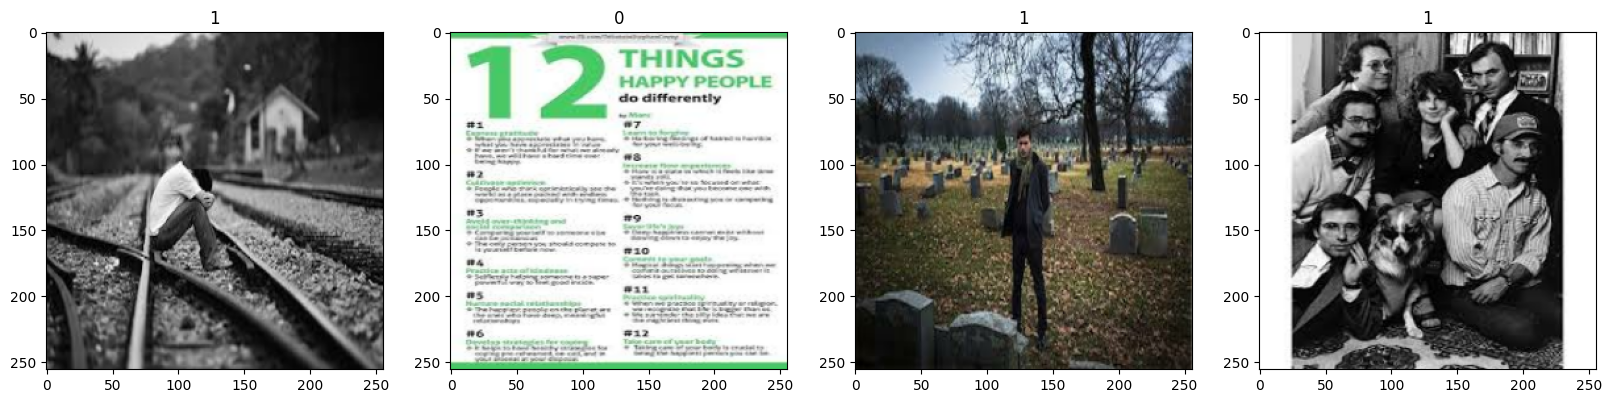

In [19]:
#check labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# sad - 1,  happy - 0

#2, preprocess Dat

2.1 Scale Data

In [20]:
data = data.map(lambda x, y: (x/255, y))

In [21]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

2.2 Split Data

In [22]:
#number of batch
len(data)

12

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [24]:
train_size + val_size + test_size == len(data)

True

In [25]:
#split out data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
len(train_augmented)

#3, Deep model

3.1 Build Deep Learning Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),

    Dense(1, activation='sigmoid')  # For binary classification
])

# model_2=Sequential([
#     Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
#     MaxPooling2D(),

#     Conv2D(32, (3,3), 1, activation='relu'),
#     MaxPooling2D(),

#     Conv2D(16, (3,3), 1, activation='relu'),
#     MaxPooling2D(),

#     Flatten(),

#     Dense(256, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# from tensorflow.keras.regularizers import l2  # Import l2 for L2 regularization

# # Define the regularization strength (lambda)
# l2_reg = 0.01  # You can adjust this value as needed

# # Model definition with L2 regularization
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Flatten(),

#     Dense(256, activation='relu', kernel_regularizer=l2(l2_reg)),
#     Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_reg))  # For binary classification
# ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,680,929 (6.41 MB)

 Trainable params: 1,680,929 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [33]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import EarlyStopping and ReduceLROnPlateau
# Callbacks
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [35]:
# Training
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 859ms/step - accuracy: 0.4775 - loss: 0.7519 - val_accuracy: 0.4792 - val_loss: 0.7111
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 403ms/step - accuracy: 0.5072 - loss: 0.6992 - val_accuracy: 0.4688 - val_loss: 0.6906
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 591ms/step - accuracy: 0.5427 - loss: 0.6787 - val_accuracy: 0.6771 - val_loss: 0.6626
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 993ms/step - accuracy: 0.6163 - loss: 0.6528 - val_accuracy: 0.6771 - val_loss: 0.5932
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 532ms/step - accuracy: 0.7433 - loss: 0.5779 - val_accuracy: 0.7917 - val_loss: 0.5400
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.7813 - loss: 0.5155 - val_accuracy: 0.6771 - val_loss: 0.5232
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 987ms/step - accuracy: 0.7568 - loss: 0.5029 - val_accuracy: 0.7708 - val_loss: 0.5154
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step - accuracy: 0.8101 - loss: 0.4833 - val_accuracy: 0.8021 - val_loss

After balancing the number of happy and sad data, the model generalized perfectly.

Let's check how the model performs with the augmented data.

2.3 Data Augmentation

In [36]:
def augment(image, label):
    """Augments an image and label."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_saturation(image, 0.8, 1.2)
    image = tf.image.random_hue(image, max_delta=0.2)


    return image, label

# Apply the augmentation function to the dataset
train_augmented = train.map(augment)

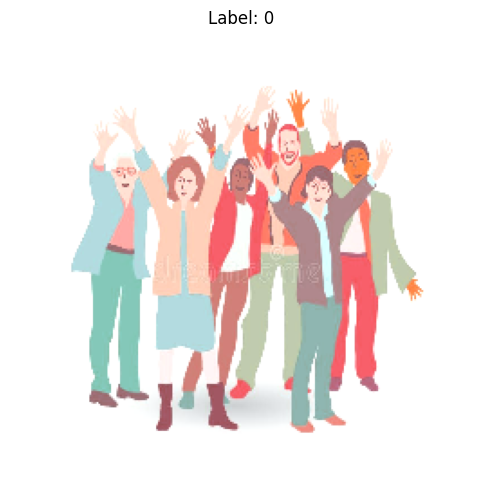

In [37]:
#plot random image
import numpy as np
import matplotlib.pyplot as plt

# Convert the dataset to a list to easily access the images
# Note: This might be inefficient if your dataset is very large, consider using batching.
images, labels = next(iter(train_augmented))

# Select a random index
random_index = np.random.randint(0, images.shape[0])

# Get the random image and label
random_image = images[random_index].numpy()
random_label = labels[random_index].numpy()

# Plot the random image
plt.figure(figsize=(6, 6))
plt.imshow(random_image)
plt.title(f'Label: {random_label}')
plt.axis('off')  # Hide axes
plt.show()

In [40]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),

    Dense(1, activation='sigmoid')  # For binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,042,789 (19.24 MB)

 Trainable params: 1,680,929 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,361,860 (12.82 MB)

In [43]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import EarlyStopping and ReduceLROnPlateau
# Callbacks
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [44]:
# Training
history = model_2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 816ms/step - accuracy: 0.5116 - loss: 0.7346 - val_accuracy: 0.4792 - val_loss: 0.6921
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 483ms/step - accuracy: 0.5677 - loss: 0.6733 - val_accuracy: 0.6250 - val_loss: 0.6410
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step - accuracy: 0.6700 - loss: 0.6251 - val_accuracy: 0.6562 - val_loss: 0.6143
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 969ms/step - accuracy: 0.7435 - loss: 0.5420 - val_accuracy: 0.7604 - val_loss: 0.5596
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 412ms/step - accuracy: 0.7440 - loss: 0.5502 - val_accuracy: 0.7396 - val_loss: 0.4965
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.8181 - loss: 0.4109 - val_accuracy: 0.8229 - val_loss: 0.3987
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step - accuracy: 0.8416 - loss: 0.3834 - val_accuracy: 0.8333 - val_loss: 0.4336
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.8225 - loss: 0.4022 - val_accuracy: 0.8125 - val_loss

After balancing the number of happy and sad data, the model_2 with augmented data also generalized perfectly.